In [1]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('dataIntel.csv')

In [3]:
df.head(10)

,Unnamed: 0,DATE,TIME,EPOCH,NODEID,TEMPERATURE,HUMIDITY,LIGHT,VOLTAGE,x_coord,y_coord
0,0,2004-02-28,01:08:45.992524,22,1,19.1456,38.9401,45.08,2.68742,10,7
1,1,2004-02-28,01:08:45.992525,25,2,19.1456,38.8379,45.08,2.69964,37,73
2,2,2004-02-28,01:08:45.992526,58,3,19.0084,38.9401,43.24,2.69964,87,8
3,3,2004-02-28,01:08:45.992527,62,4,18.9986,38.9742,43.24,2.68742,8,96
4,4,2004-02-28,01:08:45.992528,21,5,19.5670,39.6878,121.44,2.67532,8,57
5,5,2004-02-28,01:08:45.992529,25,6,19.5376,39.7557,121.44,2.67532,37,54
6,6,2004-02-28,01:08:45.992530,58,7,19.4788,39.6878,121.44,2.66332,100,51
7,7,2004-02-28,01:08:45.992531,61,8,19.4494,39.7217,121.44,2.67532,68,41
8,8,2004-02-28,01:08:45.992532,23060,9,21.2036,40.7706,50.60,2.61639,12,58
9,9,2004-02-28,01:08:45.992533,32667,10,19.6944,48.5139,1.84,2.32910,77,3


In [4]:
for i in range(0,100):
    df['NODEID'][i] = i

df.head(10)

C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/761928403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NODEID'][i] = i


,Unnamed: 0,DATE,TIME,EPOCH,NODEID,TEMPERATURE,HUMIDITY,LIGHT,VOLTAGE,x_coord,y_coord
0,0,2004-02-28,01:08:45.992524,22,0,19.1456,38.9401,45.08,2.68742,10,7
1,1,2004-02-28,01:08:45.992525,25,1,19.1456,38.8379,45.08,2.69964,37,73
2,2,2004-02-28,01:08:45.992526,58,2,19.0084,38.9401,43.24,2.69964,87,8
3,3,2004-02-28,01:08:45.992527,62,3,18.9986,38.9742,43.24,2.68742,8,96
4,4,2004-02-28,01:08:45.992528,21,4,19.5670,39.6878,121.44,2.67532,8,57
5,5,2004-02-28,01:08:45.992529,25,5,19.5376,39.7557,121.44,2.67532,37,54
6,6,2004-02-28,01:08:45.992530,58,6,19.4788,39.6878,121.44,2.66332,100,51
7,7,2004-02-28,01:08:45.992531,61,7,19.4494,39.7217,121.44,2.67532,68,41
8,8,2004-02-28,01:08:45.992532,23060,8,21.2036,40.7706,50.60,2.61639,12,58
9,9,2004-02-28,01:08:45.992533,32667,9,19.6944,48.5139,1.84,2.32910,77,3


In [5]:
x = []
y = []
for i in range(len(df)):
    x.append(df['x_coord'][i])
    y.append(df['y_coord'][i])




In [6]:
print(y[0:100])

[7, 73, 8, 96, 57, 54, 51, 41, 58, 3, 100, 49, 12, 80, 23, 53, 68, 12, 78, 47, 38, 59, 96, 69, 16, 32, 25, 97, 45, 75, 51, 71, 72, 14, 14, 52, 92, 35, 29, 5, 33, 36, 53, 23, 19, 25, 16, 72, 79, 14, 68, 41, 57, 5, 82, 34, 33, 5, 68, 37, 69, 62, 58, 48, 42, 7, 14, 58, 50, 30, 57, 17, 58, 71, 72, 27, 91, 42, 87, 3, 47, 83, 16, 89, 16, 17, 97, 82, 8, 61, 91, 24, 40, 50, 77, 78, 3, 16, 64, 96]


In [7]:
# global variables
global xc,yc,A,xbs,ybs,NCH,L,Reg,efs,emp,dth,N,Eda,Eelc,Ei # global variables
xc = 50 # centroid x coordinate
yc = 50 # centroid y coordinate
A = 0.5
xbs = 0 # base station x coordinate
ybs = 0 # base station y coordinate
NCH = 10 # number of cluster heads
L = 4000 # packet size (4000 bit)
Reg = 100 # region size (100m*100m)
efs = 10 * pow(10,-12) # energy factor for free space enviornment (10pj/bit/m^2)
emp = 0.0013 * pow(10,-12) # energy factor for multi space environment
dth = 88 # threshold distance
N = 100 #number of nodes
Eda = 5 * pow(10,-9) #energy consumption per bit during the data aggregation operation (5nj/bit/signal)
Eelc = 50 * pow(10,-9) #  energy consumption during 1-bit transmission or reception (50nj/bit/signal)
Ei = 0.5






In [8]:
# Node Class
class Node:

    # constructor
    def __init__(self,x,y,id):
        self.x = x
        self.y = y
        self.id = id
        self.ein = Ei
        self.isDead = False  # isDead is True if energy is 0 or less
        self.fch = 0
        self.On = self.findOn()
        self.isCH = 0
        self.currentRoundNumber = 0
        self.label = -1
        self.ClusterNumber = -1
        self.isDirect = True if self.On == 1 and self.ein>0 else False
        self.CHS = []
    
    def position(self):
        print(self.x,self.y)
    
    def dn2bs(self):   # node to base station distance
        return math.sqrt((self.x - xbs)**2 + (self.y - ybs)**2)
    
    def dn2n(self,xi,yi):  #node to particular node distance
        return math.sqrt((self.x - xi)**2 + (self.y - yi)**2)

    def dn2c(self):   # node to centroid distance
        return math.sqrt((self.x - xc)**2 + (self.y - yc)**2)

    # calculate On
    def findOn(self):
        Emean = 0.2
        Eres = self.ein
        if(self.dn2bs() < dth):
            Eres = self.ein - (L*Eelc + L*efs*self.dn2bs()**2)
        else:
            Eres = self.ein - (L*Eelc + L*emp*self.dn2bs()**4)
        
        if(Eres >= Emean and self.dn2bs() < dth):
            return 1
        else:
            return 0

    



In [9]:
Nodes = []
for i in range(0,100):
    obj = Node(x[i],y[i],i)
    Nodes.append(obj)

In [10]:
Anomalies = [Nodes[11],Nodes[25],Nodes[26],Nodes[27],Nodes[36],Nodes[38],Nodes[39],Nodes[52],Nodes[53],Nodes[54],Nodes[55],Nodes[56],Nodes[57],Nodes[58],Nodes[59],Nodes[60],Nodes[61],Nodes[62],Nodes[63],Nodes[76],Nodes[77],Nodes[78],Nodes[79],Nodes[80],Nodes[85],Nodes[92],Nodes[94],Nodes[96],Nodes[97],Nodes[98],Nodes[99]] # from Anomaly Detection

In [11]:
def updateisDirect(Nodes):
    for i in range(0,100):
        Nodes[i].isDirect = True if Nodes[i].On == 1 and Nodes[i].ein>0 and Nodes[i] not in Anomalies else False

In [12]:
# Calculate Energies
# def findResidualTotal(Nodes):  # Residual Energy of all nodes
#     Eres = []
#     print(type(Nodes))
#     for i in range(0,len(Nodes)):
#         Eres.append(Nodes[i].ein - (L*Eelc + L*efs*Nodes[i].dn2bs()**2))
#     return Eres

# def findResidual(Node):  # Residual Energy of a particular node
#     Eres = Node.ein - (L*Eelc + L*efs*Node.dn2bs()**2)
#     return Eres


def findETx(d):  # energy consumption for transmission
    if(d < dth):
        return L*Eelc + L*efs*d**2
    else:
        return L*Eelc + L*emp*d**4

def findERx(): # energy consumption for reception
    return L*Eelc








In [13]:
# Number of Alive Nodes without direct nodes
def findAliveNodes(Nodes):
    count = 0
    for i in range(0,len(Nodes)):
        if(Nodes[i].On == 0 and Nodes[i].ein > 0 and Nodes[i] not in Anomalies):
            count += 1
    return count

In [14]:
Na = findAliveNodes(Nodes)
print(Na)

22


In [15]:
for i in range(0,len(Nodes)):
    print(Nodes[i].On,Nodes[i].ein)

1 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
1 0.5
0 0.5
0 0.5
1 0.5
0 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
1 0.5
0 0.5
0 0.5
0 0.5
1 0.5
1 0.5
1 0.5
1 0.5
0 0.5
0 0.5
1 0.5
0 0.5
0 0.5
1 0.5
1 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
0 0.5
1 0.5
0 0.5
1 0.5
0 0.5
1 0.5
0 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
1 0.5
0 0.5
0 0.5
1 0.5
1 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
0 0.5
1 0.5
0 0.5
0 0.5
1 0.5
0 0.5
1 0.5
1 0.5
0 0.5
1 0.5
0 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
1 0.5
0 0.5
1 0.5
1 0.5
0 0.5
0 0.5
1 0.5
1 0.5
1 0.5
1 0.5
0 0.5


In [16]:
#   Count of Direct Nodes
def findDirectNodes(Nodes):
    count = 0
    for i in range(0,len(Nodes)):
        if(Nodes[i].On == 1 and Nodes[i].ein > 0 and Nodes[i] not in Anomalies):
            count += 1
    return count

In [17]:
ds = findDirectNodes(Nodes)
print(ds)


47


In [18]:
# Optimum Number of K
def findKopt(Na):
    dbs = 85
    Kopt = round(math.sqrt(Na/(2*math.pi))*(math.sqrt(efs/emp))*(Reg/dbs**2)) # optimum number of Cluster Heads
    if(Kopt ==0):
        return Kopt+1
    else:
        return Kopt

Kopt = findKopt(Na)
Kopt  

2

In [19]:
def findNc(Kopt,Na):
    Nc = round(Na/ Kopt) # optimum number of nodes in each cluster
    return Nc

Nc = findNc(Kopt,Na)
Nc


11

In [20]:
# find x1
def findx1(Node):
   # print(Node.ein**3/Ei)
    return Node.ein/Ei

# dmax
def findDmax(Nodes,Nc):
    d =[]
    for i in range(0,Nc):
        d.append(Nodes[i].dn2c())
    if(len(d)>0):
        return max(d)
    else:
        return 1
    #return max(d)

dmax = findDmax(Nodes,Nc)

# find x2
def findX2(Node,dmax):
    return (dmax - Node.dn2c())/dmax

# find x2dash
def findX2dash(Node,dmax):
    return (Node.dn2c()-dmax)/Node.dn2c()





In [21]:
findx1(Nodes[0])

1.0

In [22]:
# FCH Function
def findFCH(Nodes,dmax):
    FCH = []
    alpha = 0.8
    ans = 0
    for i in range(0,100):
        if(Nodes[i].ein <= 0 or Nodes[i] in Anomalies):
            FCH.append(-999999)
        elif(Nodes[i].isDirect == False):
            if(Nodes[i].dn2c() < dmax):
                ans = alpha*findx1(Nodes[i]) + (1-alpha)*findX2(Nodes[i],dmax)
                FCH.append(ans)
            elif(Nodes[i].dn2c() == dmax):
                ans = findx1(Nodes[i])
                FCH.append(ans)
            else:
                ans = alpha*findx1(Nodes[i]) + (1-alpha)*findX2dash(Nodes[i],dmax)
                FCH.append(ans)
        else:
            FCH.append(-1)
   # print("End")
    # print(FCH)
    # print("END")
    return FCH


    

In [23]:
FCH = findFCH(Nodes,dmax)
print(FCH)

[-1, -1, -1, 0.8035378819216263, -1, -1, 0.8422680018575797, -1, -1, -1, 1.0, -999999, -1, 0.8807717763651717, -1, -1, 0.917451678896023, -1, -1, -1, 0.8500601131810194, 0.9393314212409372, 0.8077347434573408, -1, -1, -999999, -999999, -999999, 0.8446510374219189, -1, 0.8801061565463637, 0.9017689409608132, -1, -1, -1, -1, -999999, -1, -999999, -999999, -1, -1, -1, -1, -1, -1, -1, -1, 0.9083164726531017, -1, 0.917451678896023, -1, -999999, -999999, -999999, -999999, -999999, -999999, -999999, -999999, -999999, -999999, -999999, -999999, -1, -1, -1, 0.9020732196238075, -1, -1, 0.8625923022384542, -1, -1, 0.8289549653464564, -1, 0.8517280169755175, -999999, -999999, -999999, -999999, -999999, 0.811048785259653, -1, 0.8347226938946113, -1, -999999, 0.8290422258068522, -1, -1, -1, 0.8299757905969315, -1, -999999, 0.8549155756927265, -999999, -1, -999999, -999999, -999999, -999999]


In [24]:
def make_dataframe(df,FCH):
    df2 = df['NODEID']
    df2 = pd.DataFrame(df2)
    df2['x_coord'] = x
    df2['y_coord'] = y
    df2['FCH'] = FCH
    df2['isAnomaly'] = 0

    for i in range(0,len(df2)):
        if(Nodes[i] in Anomalies):
            df2['isAnomaly'][i] = 1
    
        
    return df2

df2 = make_dataframe(df,FCH)
df2.sample(20)


C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/941336843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['isAnomaly'][i] = 1


,NODEID,x_coord,y_coord,FCH,isAnomaly
99,99,42,96,-999999.000000,1
58,58,33,68,-999999.000000,1
88,88,83,8,-1.000000,0
82,82,51,16,-1.000000,0
46,46,46,16,-1.000000,0
74,74,16,72,-1.000000,0
59,59,35,37,-999999.000000,1
23,23,26,69,-1.000000,0
98,98,31,64,-999999.000000,1
70,70,93,57,0.862592,0


In [25]:
# Finc Clusters of Non-Direct Nodes using K-Means Clustering
def find_cluster(Nodes,Kopt):
    xwd =[] # x-coordinate array without direct nodes
    ywd = [] # y-coordinate array without direct nodes
    for i in range(0,100):
        if(Nodes[i].ein > 0 and Nodes[i] not in Anomalies and Nodes[i].isDirect == False):
            xwd.append(Nodes[i].x)
            ywd.append(Nodes[i].y)
    xwd = np.array(xwd)
    ywd = np.array(ywd)
    dfa = pd.DataFrame(np.array([xwd,ywd]).T,columns=['xwd','ywd'])
    if(len(dfa)) > 0:
        sc_dfa = StandardScaler()
        dfa_std = sc_dfa.fit_transform(dfa.astype(float))
        kmeans = KMeans(n_clusters=Kopt, random_state=42).fit(dfa_std)
        labels = kmeans.labels_
    else:
        labels = [-1]
    return labels
    # print(labels)
    # new_dfa = pd.DataFrame(data = dfa_std, columns = ['x_coord','y_coord'])
    # new_dfa['label_kmeans'] = labels
    # fig, ax = plt.subplots(figsize=(10,7))
    # plt.scatter(new_dfa["y_coord"][new_dfa["label_kmeans"] == 0], new_dfa["x_coord"][new_dfa["label_kmeans"] == 0], 
    #         color = "blue", s=100, edgecolor='green',linestyle='--')
    # plt.scatter(new_dfa["y_coord"][new_dfa["label_kmeans"] == 1], new_dfa["x_coord"][new_dfa["label_kmeans"] == 1], 
    #         color = "red", s=100, edgecolor='green',linestyle='--')
    # plt.scatter(new_dfa["y_coord"][new_dfa["label_kmeans"] == 2], new_dfa["x_coord"][new_dfa["label_kmeans"] == 2], 
    #         color = "green", s=100, edgecolor='green',linestyle='--')
    # centers = kmeans.cluster_centers_
    # plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
    # ax.set_xlabel('x_coord')
    # ax.set_ylabel('y_coord')
    # plt.show()

    
labels = find_cluster(Nodes,Kopt)


In [26]:
def addLabels(df2,labels):
    df2['labels'] = 0
    j = 0
    for i in range(0,len(df2)):
        if(Nodes[i].ein > 0 and Nodes[i] not in Anomalies and Nodes[i].isDirect == False):
            df2['labels'][i] = labels[j]
            j = j+1
        else:
            df2['labels'][i] = -1
    return df2


df2 = addLabels(df2,labels)
df2.tail(40)

C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/2052360357.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['labels'][i] = -1
C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/2052360357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['labels'][i] = labels[j]


,NODEID,x_coord,y_coord,FCH,isAnomaly,labels
60,60,26,69,-999999.000000,1,-1
61,61,65,62,-999999.000000,1,-1
62,62,90,58,-999999.000000,1,-1
63,63,28,48,-999999.000000,1,-1
64,64,37,42,-1.000000,0,-1
65,65,42,7,-1.000000,0,-1
66,66,28,14,-1.000000,0,-1
67,67,80,58,0.902073,0,0
68,68,18,50,-1.000000,0,-1
69,69,36,30,-1.000000,0,-1


In [27]:
def updateLabelFCH(Nodes,df2):
    for i in range(0,len(Nodes)):
        Nodes[i].label = df2['labels'][i]
        Nodes[i].fch = df2['FCH'][i]


updateLabelFCH(Nodes,df2)


In [28]:
def find_ClusterHeads(Nodes,labels,Kopt):
    ClusterHeads = []
    temp = [0 for i in range(0,Kopt)] # counter array for no of nodes in each cluster
    j = 0
    for i in range(0,len(Nodes)):
        if(Nodes[i].ein > 0 and Nodes[i] not in Anomalies and Nodes[i].isDirect == False):
            temp[labels[j]] += 1
            j += 1
    c = 0
    while(c<Kopt):
        temp2 = []
        for i in range(0,len(Nodes)):
            if(Nodes[i].label == c):
                temp2.append(Nodes[i])

        temp2.sort(key=lambda x: x.fch, reverse=True)
        if(len(temp2)>0):
            ClusterHeads.append(temp2[0])
        
        c += 1
    
    return ClusterHeads 
        


ClusterHeads = find_ClusterHeads(Nodes,labels,Kopt)
for i in range(0,len(ClusterHeads)):
    print(ClusterHeads[i].id)

    

67
10


In [29]:
count = 0
for i in range(0,len(FCH)):                 
    if(FCH[i] == -1):
        count += 1
print(count)

47


In [30]:
# Every Node to Every Cluster Head Distance

def findCD(Nodes,ClusterHeads):
    dist = [] # empty dictionary
    for i in range(0,len(ClusterHeads)):
        li = []
        for j in range(0,len(Nodes)):
            if(Nodes[j].isDirect == False):
                li.append(Nodes[j].dn2n(ClusterHeads[i].x,ClusterHeads[i].y))
        dist.append(li)
    return dist

In [31]:
for i in range(0,len(ClusterHeads)):
    print(ClusterHeads[i].id)

67
10


In [32]:
def findCHDistance(Nodes,ClusterHeads):
    for i in range(0,100):
        if(Nodes[i].isDirect == False):
            for j in range(0,len(ClusterHeads)):
                if(len(Nodes[i].CHS) < len(ClusterHeads)):
                    Nodes[i].CHS.append(Nodes[i].dn2n(ClusterHeads[j].x,ClusterHeads[j].y))

        


           

In [33]:
findCHDistance(Nodes,ClusterHeads)
Nodes[3].CHS

[81.41252974819048, 81.09870529176159]

In [34]:
# Find Cluster Number for Every Node
def findClusterNumber(Nodes,ClusterHeads,labels):
    ans = []
    j = 0
    for i in range(0,100):
        if(Nodes[i].isDirect == True):
            ans.append(-1)
        elif(Nodes[i] in ClusterHeads):
            ans.append(0)
        elif(Nodes[i] in Anomalies):
            ans.append(-2)
        elif(Nodes[i].ein <= 0):
            ans.append(-3)
        else:
            ans.append(labels[j])
            j += 1
                   
    return ans

                    

In [35]:
ClusterNum = findClusterNumber(Nodes,ClusterHeads,labels)
print(ClusterNum)
print(len(ClusterNum))

[-1, -1, -1, 1, -1, -1, 0, -1, -1, -1, 0, -2, -1, 1, -1, -1, 1, -1, -1, -1, 1, 0, 1, -1, -1, -1, -1, -2, 1, -1, 0, 0, -1, -1, -1, -1, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -2, -1, -2, -1, -1, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, 0, -1, -1, 1, -1, -1, 0, -1, 0, -2, -1, -2, -1, -1, 0, -1, 0, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -2, -1, -1, -1, -1, -2]
100


In [36]:
def addWhichCH(df2,ClusterNum):
    df2['whichCH'] = ClusterNum
    return df2

df2 = addWhichCH(df2,ClusterNum)
df2[1:10]

,NODEID,x_coord,y_coord,FCH,isAnomaly,labels,whichCH
1,1,37,73,-1.000000,0,-1,-1
2,2,87,8,-1.000000,0,-1,-1
3,3,8,96,0.803538,0,1,1
4,4,8,57,-1.000000,0,-1,-1
5,5,37,54,-1.000000,0,-1,-1
6,6,100,51,0.842268,0,0,0
7,7,68,41,-1.000000,0,-1,-1
8,8,12,58,-1.000000,0,-1,-1
9,9,77,3,-1.000000,0,-1,-1


In [37]:
#df2.to_csv('ClusteredData2.csv')

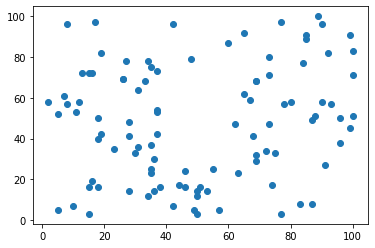

In [38]:
plt.scatter(df2['x_coord'],df2['y_coord'])
plt.show()

In [39]:
def addClusterNumber(df2):
    Cluster = copy.deepcopy(list(df2['whichCH']))
    c = 1
    for i in range(0,len(Cluster)):
        if(Cluster[i] == 0):
            Cluster[i] = c
            c += 1

    df2['ClusterNumber'] = Cluster
    return df2

df2 = addClusterNumber(df2)
df2[1:50]

,NODEID,x_coord,y_coord,FCH,isAnomaly,labels,whichCH,ClusterNumber
1,1,37,73,-1.000000,0,-1,-1,-1
2,2,87,8,-1.000000,0,-1,-1,-1
3,3,8,96,0.803538,0,1,1,1
4,4,8,57,-1.000000,0,-1,-1,-1
5,5,37,54,-1.000000,0,-1,-1,-1
6,6,100,51,0.842268,0,0,0,1
7,7,68,41,-1.000000,0,-1,-1,-1
8,8,12,58,-1.000000,0,-1,-1,-1
9,9,77,3,-1.000000,0,-1,-1,-1
10,10,89,100,1.000000,0,1,0,2


In [40]:
def updateisCH(df2,Nodes,ClusterHeads):
    df2['CH'] = 0
    for i in range(0,len(Nodes)):
        if(Nodes[i] in ClusterHeads):
            df2['CH'][i] = 1
    for i in range(0,100):
        Nodes[i].isCH = df2['CH'][i]
        Nodes[i].ClusterNumber = df2['ClusterNumber'][i]

updateisCH(df2,Nodes,ClusterHeads)
df2.head(30) 

C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/3379197693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CH'][i] = 1


,NODEID,x_coord,y_coord,FCH,isAnomaly,labels,whichCH,ClusterNumber,CH
0,0,10,7,-1.000000,0,-1,-1,-1,0
1,1,37,73,-1.000000,0,-1,-1,-1,0
2,2,87,8,-1.000000,0,-1,-1,-1,0
3,3,8,96,0.803538,0,1,1,1,0
4,4,8,57,-1.000000,0,-1,-1,-1,0
5,5,37,54,-1.000000,0,-1,-1,-1,0
6,6,100,51,0.842268,0,0,0,1,0
7,7,68,41,-1.000000,0,-1,-1,-1,0
8,8,12,58,-1.000000,0,-1,-1,-1,0
9,9,77,3,-1.000000,0,-1,-1,-1,0


# Energy Loss During Transmission Phase

In [41]:
#In case of Direct Nodes
def findEnergyDirectNodes(Nodes):
    for i in range(0,100):
        if(Nodes[i].isDirect == True):
            d = Nodes[i].dn2bs()
            Nodes[i].ein = Nodes[i].ein - (findETx(d))


findEnergyDirectNodes(Nodes)



In [42]:
for i in range(0,10):
    print(Nodes[i].ein)

0.49979404
0.49953208
0.49949468
0.5
0.49966748
0.4996286
0.5
0.4995478
0.49965968
0.49956248


In [43]:
# In case of Non Direct Nodes
def findEnergyNonDirectNodes(ClusterHeads,Nodes):
    for i in range(0,len(Nodes)):
        if(Nodes[i].ClusterNumber <= len(ClusterHeads)):
            if(Nodes[i].isDirect == False and Nodes[i].ein > 0 and Nodes[i] not in Anomalies): 
                X = ClusterHeads[(Nodes[i].ClusterNumber)-1].x
                Y = ClusterHeads[(Nodes[i].ClusterNumber)-1].y
                d = Nodes[i].dn2n(X,Y)
                Nodes[i].ein = Nodes[i].ein - (findETx(d)) # Transmission Energy loss by Cluster Nodes during transmitting
                
                ClusterHeads[Nodes[i].ClusterNumber-1].ein = ClusterHeads[Nodes[i].ClusterNumber-1].ein - (findERx()) # Transmission Energy loss by Cluster Head during receiving the data
            
findEnergyNonDirectNodes(ClusterHeads,Nodes)

In [44]:
for i in range(0,10):
    print(Nodes[i].ein)

0.49979404
0.49953208
0.49949468
0.49953488
0.49966748
0.4996286
0.49978204
0.4995478
0.49965968
0.49956248


# Proposed Fitness Function Implementation

In [45]:
A = 0.5

# base station coordinates
x_bs = 0
y_bs = 0

def CH2BS(x_ch,y_ch):
    return math.sqrt((x_ch - xbs)**2 + (y_ch - ybs)**2)

def CH2C(x_ch,y_ch):
    return math.sqrt((x_ch - xc)**2 + (y_ch - yc)**2)

def dMax(CH):
    d_max = 0
    for i in range(len(CH)):
        d = CH2BS(CH[i].x,CH[i].y)
        if d > d_max:
            d_max = d
        
    return d_max + 1


def d2Max(CH):
    d_max = 0
    for i in range(len(CH)):
        d = CH2C(CH[i].x,CH[i].y)
        if d > d_max:
            d_max = d

    return d_max + 1

In [46]:
def findZ1(obj):
    return obj.ein/Ei

def findZ2(dmax,dCH2BS):
    return (dmax-dCH2BS)/dmax

def findZ3(d2max,dCH2C):
    return (d2max-dCH2C)/d2max

def findCHtoNodes(ClusterHead,Nodes):
    obj = []
    clusterNumber = ClusterHead.ClusterNumber
    for i in range(len(Nodes)):
        if(Nodes[i].ClusterNumber == clusterNumber and Nodes[i].isCH == 0):
            obj.append(Nodes[i])
    return obj

def findZ4(ClusterHead,Nodes):
    mini =  2147483647  # Maximum value of int
    obj = findCHtoNodes(ClusterHead,Nodes)
    ans = 0
    for i in range(0,len(obj)):
        temp = obj[i].dn2n(ClusterHead.x,ClusterHead.y)
        if(temp < mini ):
            mini = temp
        ans = ans + temp
    
    if(mini > 0):
        return ans/mini
    else:
        return ans/1

    



def findFO(A,x1,x2,x3,x4):
    return A*x1 + 0.4*A*x2 + (1-1.4*A)*x3 + 0.4*A*x4

In [47]:
for i in range(len(ClusterHeads)):
    print(ClusterHeads[i].ein)

0.4974000000000003
0.49960000000000004


In [48]:
def findGCH(ClusterHeads,Nodes):
    gch = []  # Fitness Value Array for Finding Global Cluster Head
    for i in range(0,len(ClusterHeads)):
        val = findFO(A,findZ1(ClusterHeads[i]),findZ2(dMax(ClusterHeads),CH2BS(ClusterHeads[i].x,ClusterHeads[i].y)),findZ3(d2Max(ClusterHeads),CH2C(ClusterHeads[i].x,ClusterHeads[i].y)),findZ4(ClusterHeads[i],Nodes))
        gch.append(val)
    
    return gch


gch = findGCH(ClusterHeads,Nodes)
print(gch)
 
def selectGCH(gch,ClusterHeads):
    if(len(ClusterHeads) !=0):
        maxi = gch[0]
        k = 0
        for i in range(1,len(gch)):
            if(gch[i] > maxi):
                maxi = gch[i]
                k = i
        return ClusterHeads[k]
    else:
        return -1

    


[0.706258946747509, 0.505740480572615]


In [49]:
Global_CH = selectGCH(gch,ClusterHeads) # Global Cluster Head
Global_CH.id

67

In [50]:
# Cluster Head to Cluster Head Communication
def findEnergyCH2CH(ClusterHeads,Global_CH):
    for i in range(0,len(ClusterHeads)):
        if(ClusterHeads[i] != Global_CH):
            d = ClusterHeads[i].dn2n(Global_CH.x,Global_CH.y)
            ClusterHeads[i].ein = ClusterHeads[i].ein - (findETx(d))
            Global_CH.ein = Global_CH.ein - (findERx())

findEnergyCH2CH(ClusterHeads,Global_CH)

In [51]:
# Global Cluster Head to Base Station Communication
def gchtoBS(Global_CH):
    d = Global_CH.dn2bs()
    Global_CH.ein = Global_CH.ein - (findETx(d))

In [52]:
# Update isDead Attribute
def updateisDead(Nodes):
    for i in range(0,len(Nodes)):
        if(Nodes[i].ein <= 0):
            Nodes[i].isDead = True
        else:
            Nodes[i].isDead = False

In [53]:
Global_CH.id

67

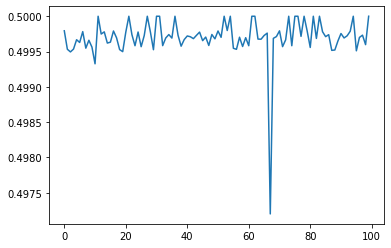

In [54]:
Energy = []
for i in range(0,len(Nodes)):
    Energy.append(Nodes[i].ein)

    
plt.plot(Energy)
plt.show()

In [55]:
def findFinalEnergy(Nodes):
    TotalEnergy = 0
    TotalEnergy_Anomaly = 0
    for i in range(0,len(Nodes)):
        if(Nodes[i] not in Anomalies and Nodes[i].ein > 0):
            TotalEnergy = TotalEnergy + Nodes[i].ein
    
    # for i in range(0,len(Anomalies)):
    #     TotalEnergy_Anomaly = TotalEnergy_Anomaly + Anomalies[i].ein
    
    return TotalEnergy

    

In [56]:
# Total Energy before Anomaly Detection
TotalEnergy = 0
for i in range(0,len(Nodes)):
    TotalEnergy = TotalEnergy + Nodes[i].ein

TotalEnergy

49.97009352

In [57]:
# Total Energy after Anomaly Detection
TotalEnergy_Anomaly = 0
for i in range(0,len(Anomalies)):
    TotalEnergy_Anomaly = TotalEnergy_Anomaly + Anomalies[i].ein
TotalEnergy_Anomaly

15.493171999999996

In [58]:
Final_Energy = TotalEnergy - TotalEnergy_Anomaly
Final_Energy

34.476921520000005

In [59]:
Efficiency = (Final_Energy/TotalEnergy)*100
Efficiency

68.99511105817919

In [60]:
# # for 10000 rounds
def NumberOfRounds(Nodes):
    ResiudalEnergies = []
    NumberOfDeadNodes = [] 
    FinalEnergies = []
    NumberofCH = []
    for i  in range(0,2000):  # number of iterations
        updateisDirect(Nodes)
        Nai = findAliveNodes(Nodes)
        dsi = findDirectNodes(Nodes)
        #print(dsi)
        Kopti = findKopt(Nai)
        NumberofCH.append(Kopti)
        Nci = findNc(Kopti,Nai)
        dmaxi = findDmax(Nodes,Nci)
        FCHi = findFCH(Nodes,dmaxi)
        dfi = make_dataframe(df,FCHi)
        labelsi = find_cluster(Nodes,Kopti)
        dfi = addLabels(dfi,labelsi)
        updateLabelFCH(Nodes,dfi)
        Ci = copy.deepcopy(FCHi)
        ClusterHeadsi = find_ClusterHeads(Nodes,labelsi,Kopti)
        # for i in range(0,len(ClusterHeadsi)):
        #     print(ClusterHeadsi[i].id)
        findCHDistance(Nodes,ClusterHeadsi)
        ClusterNumberi = findClusterNumber(Nodes,ClusterHeadsi,labelsi)
        #print(ClusterNumberi)
        dfi = addWhichCH(dfi,ClusterNumberi)
        dfi = addClusterNumber(dfi)
        updateisCH(dfi,Nodes,ClusterHeadsi)
        findEnergyDirectNodes(Nodes)
        findEnergyNonDirectNodes(ClusterHeadsi,Nodes)
        gchi = findGCH(ClusterHeadsi,Nodes)
        Global_CHi = selectGCH(gchi,ClusterHeadsi)
        findEnergyCH2CH(ClusterHeadsi,Global_CHi)
        gchtoBS(Global_CHi)
        # Count of direct nodes after every iteration
        countDeadNodes = 0
        updateisDead(Nodes)
        for i in range(0,len(Nodes)):
            if(Nodes[i].isDead == True):
                countDeadNodes = countDeadNodes + 1
        NumberOfDeadNodes.append(countDeadNodes)
        # Final Energy after every iteration
        E = findFinalEnergy(Nodes)
        FinalEnergies.append(E)
        #print("Next Iteration")

        # Initalize Clustering part of Nodes object fter every iteration
        for j in range(0,len(Nodes)):
            Nodes[j].CHS = []
            Nodes[j].isCH = 0
            Nodes[j].ClusterNumber = -1
            Nodes[j].fch = 0
            Nodes[j].label = -1
            Nodes[j].currentRoundNumber += 1
            # if Nodes[i].currentRoundNumber%20 == 0 and Nodes[i].currentRoundNumber < 1000:
            #     Nodes[i].ein = Nodes[i].ein + 0.001
            Nodes[j].On = Nodes[j].findOn()
            Nodes[j].isDirect =  True if Nodes[j].On == 1 and Nodes[j].ein>0 and Nodes[j] not in Anomalies else False


        
    return NumberOfDeadNodes,FinalEnergies,NumberofCH






    









In [61]:
NumberofDeadNodes,FinalEnergies,NumberOfCH = NumberOfRounds(Nodes)

C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/941336843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['isAnomaly'][i] = 1
C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/2052360357.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['labels'][i] = -1
C:\Users\goyal\AppData\Local\Temp/ipykernel_5748/2052360357.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['labels'][i] = labels[j]
C:\Users\goyal\AppData\Local

In [62]:
FinalEnergies[len(FinalEnergies)-1]

0.043575825057626943

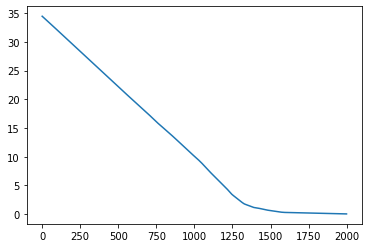

In [63]:
xr = np.arange(0,2000,1)
plt.plot(xr,FinalEnergies) 

plt.show()

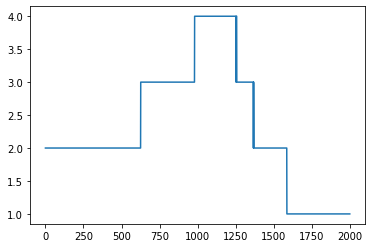

In [64]:
plt.plot(xr,NumberOfCH) 
plt.show()

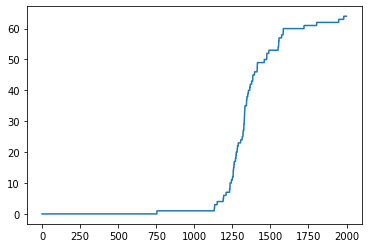

In [65]:
plt.plot(xr,NumberofDeadNodes)
plt.show()

In [66]:
TE = []
TAE = []
te  = 0
tae = 0
for i in range(0,len(Nodes)):
    if(Nodes[i] in Anomalies):
        tae = tae + Nodes[i].ein
        TAE.append(Nodes[i].ein)
    else:
        te = te + Nodes[i].ein
        TE.append(Nodes[i].ein)


In [67]:
TAE

[0.5,
 0.4995686,
 0.499726,
 0.5,
 0.5,
 0.49957592,
 0.49966904,
 0.5,
 0.499798,
 0.5,
 0.4995464,
 0.49953144,
 0.49970296,
 0.49957148,
 0.49969624,
 0.49958252,
 0.5,
 0.5,
 0.49967648,
 0.5,
 0.499715,
 0.5,
 0.49979064,
 0.49955788,
 0.499711,
 0.49972304,
 0.5,
 0.49969964,
 0.499732,
 0.49959772,
 0.5]

In [68]:
NumberofDeadNodes[len(NumberofDeadNodes)-1]

64

In [69]:
# for i in range(0,len(FinalEnergies)-1):
#     if(FinalEnergies[i+1] > FinalEnergies[i]):
#         print(i)
#         print(FinalEnergies[i])
FinalEnergies[1999]

0.043575825057626943

In [70]:
# Importing Leach Data
operatingNodes = [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,
100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,99,98,98,98,
98,98  ,  97  ,  97  ,  97  ,  97   , 97  ,  97  ,  97 ,   97  ,  97 ,   97,    97,97,97 ,   97,    97 ,   97,    96,    96,
96,96   , 96  ,  96   , 96  ,  96   , 95  ,  95   , 95 ,   95   , 95  ,  95   , 95 ,   95  ,  95 ,   95 ,   94 ,   94 ,   94,    94,
94,94  ,  94  ,  94   , 93   , 93   , 93  ,  93   , 93  ,  93   , 91   , 91   , 90  ,  90  ,  90  ,  90  ,  90 ,   90  ,  89 ,   88,
88,88  ,  88  ,  88   , 87   , 87   , 87  ,  87   , 87  ,  86   , 86   , 86   , 86  ,  86  ,  86  ,  86  ,  86  ,  86  ,  86 ,   86,
86,86  ,  86   , 85   , 84   , 84   , 84  ,  84   , 84 ,   84  ,  82  ,  81   , 81  ,  80  ,  78  ,  78   , 78   , 78   , 78  ,  78,
78,78   , 78  ,  78   , 77   , 76  ,  76  ,  75   , 75 ,   74  ,  73  ,  73   , 73  ,  72  ,  72  ,  72  ,  71   , 71  ,  71   , 70,
69,69  ,  69  ,  69   , 69   , 69  ,  68  ,  68    ,68 ,   68  ,  68  ,  68   , 68   , 67  ,  67  ,  67   , 65  ,  64  ,  64 ,   63,
63,62   , 61  ,  61   , 61   , 61  ,  61  ,  60   , 60 ,   60  ,  60  ,  59   , 57   , 57  ,  57  ,  54  ,  51  ,  51  ,  51  ,  51,
50,50  ,  50  ,  50   , 49   , 47  ,  47  ,  47   , 46 ,   46  ,  46  ,  46   , 46   , 44  ,  44   , 43  ,  40   , 40  ,  38  ,  37,
37,37  ,  37  ,  37   , 37   , 35  ,  35  ,  35   , 35  ,  35  ,  35  ,  35   , 35   , 35  ,  35   , 35  ,  34  ,  34  ,  34  ,  33,
32,31   , 31  ,  31   , 29   , 29  ,  27  ,  27   , 26  ,  26  ,  24  ,  24  ,  24   , 24  ,  23  ,  23  ,  23   , 23  ,  23  ,  23,
23,23  ,  23   , 23   , 23   , 21   , 21  ,  21   , 20  ,  20  ,  20   , 20   , 20   , 20  ,  20  ,  19  ,  18  ,  18  ,  18  ,  18,
18,18   , 18  ,  17   , 16   , 16  ,  16  ,  16   , 16  ,  16  ,  16   , 16  ,  16   , 15  ,  15   , 15  ,  15   , 15  ,  15  ,  14,
13,13  ,  13   , 13  ,  12   , 12 ,   11   , 11  ,  11  ,  11  ,  11   , 11 ,   11   , 11 ,   10  ,  10 ,   10 ,   10  ,  10  ,   8,
8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,
8,8    , 8  ,   8  ,   8  ,   8    , 8   ,  8   ,  8 ,    7   ,  7  ,   7    , 5  ,   5    , 5 ,    5   ,  5 ,    5   ,  5,     5,
5,5    , 5   ,  5   ,  5  ,   5   ,  5   ,  5   ,  5  ,   5   ,  5  ,   5   ,  5  ,   5   ,  5  ,   5   ,  5  ,   5   ,  5 ,    5,
5,5    , 5   ,  5   ,  5  ,   5   ,  5   ,  5   ,  5   ,  5   ,  5  ,   5   ,  5  ,   5   ,  5   ,  5   ,  5  ,   5  ,   5  ,   4,
3,3     ,3   ,  3   ,  3  ,   3   ,  3   ,  2   ,  2   ,  2  ,   2  ,   2   ,  2  ,   2    , 2   ,  2   ,  2  ,   2  ,   2   ,  2,
2,2   ,  2   ,  2   ,  2  ,   2   ,  2   ,  2   ,  2  ,   2  ,   2  ,   2   ,  2  ,   2   ,  2   ,  2   ,  2  ,   2  ,   2   ,  2,
2,2    , 2   ,  2   ,  2  ,   2   ,  2   ,  2  ,   2   ,  2   ,  2   ,  2   ,  2   ,  2   ,  2   ,  2    , 2   ,  2   ,  2    , 2,
2,2    , 2   ,  2   ,  2  ,   2  ,   2   ,  2   ,  2   ,  2  ,   1  ,   1  ,   1   ,  1  ,   1  ,   1  ,   1  ,   1  ,   1 ,    1,
1,1    , 1   ,  1   ,  1   ,  1  ,   1   ,  1   ,  1   ,  1  ,   1  ,   1  ,   1   ,  1   ,  1  ,   1   ,  1  ,   1  ,   1  ,   1,
1,1    , 1   ,  1  ,   1  ,   1  ,   1   ,  1  ,   1    , 1  ,   1  ,   1  ,   1   ,  1  ,   1   ,  1  ,   1  ,   1  ,   1   ,  1,
1,1    , 1   ,  1   ,  1  ,   1   ,  1  ,   1  ,   1   ,  1  ,   1  ,   1  ,   1  ,   1  ,   1 ,    1  ,   1 ,    1 ,    1,     1,
1,1    , 1   ,  1  ,   1   ,  1   ,  1   ,  1  ,   0]

operatingNodes = list(operatingNodes)






In [71]:
print(len(operatingNodes))

909


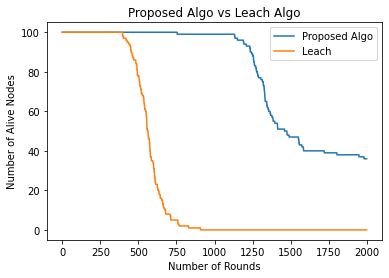

In [72]:
# Plotting graph Leach vs Proposed Algo
AliveNodes = []
for i in range(0,len(NumberofDeadNodes)):
    AliveNodes.append(len(Nodes)-NumberofDeadNodes[i])

for i in range(len(operatingNodes),len(NumberofDeadNodes)):
    operatingNodes.append(0)

# print(len(operatingNodes))
# print(len(AliveNodes))


plt.plot(xr,AliveNodes,label='Proposed Algo')
plt.plot(xr,operatingNodes,label='Leach')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Alive Nodes')
plt.title('Proposed Algo vs Leach Algo')
plt.legend()
plt.show()



In [74]:
print(FinalEnergies)

[34.4531472943808, 34.429373068761606, 34.4055988431424, 34.3818246175232, 34.3578529393432, 34.33407871372401, 34.31010703554401, 34.28633280992481, 34.26236113174481, 34.2385869061256, 34.214615227945615, 34.19040526236161, 34.166433584181604, 34.14265935856241, 34.1184493929784, 34.0933654194584, 34.06939374127842, 34.0456195156592, 34.02109435752802, 33.99601038400801, 33.972038705828005, 33.947828740244006, 33.92405451462482, 33.899466793652, 33.87494163552082, 33.849857662000815, 33.82588598382081, 33.80167601823681, 33.777901792617605, 33.75281781909762, 33.72884614091761, 33.70423120547761, 33.679643484504815, 33.65511832637361, 33.63090836078962, 33.60645865831522, 33.581374684795215, 33.55668954846483, 33.53271787028482, 33.508943644665614, 33.484355923692824, 33.459740988252825, 33.43465701473282, 33.41043292413282, 33.38622295854881, 33.36232751827962, 33.33835584009962, 33.31385761762521, 33.28875603194522, 33.26486059167602, 33.24108636605681, 33.21686227545682, 33.192652